<a href="https://colab.research.google.com/github/2303a52118/PROJECTS/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimete

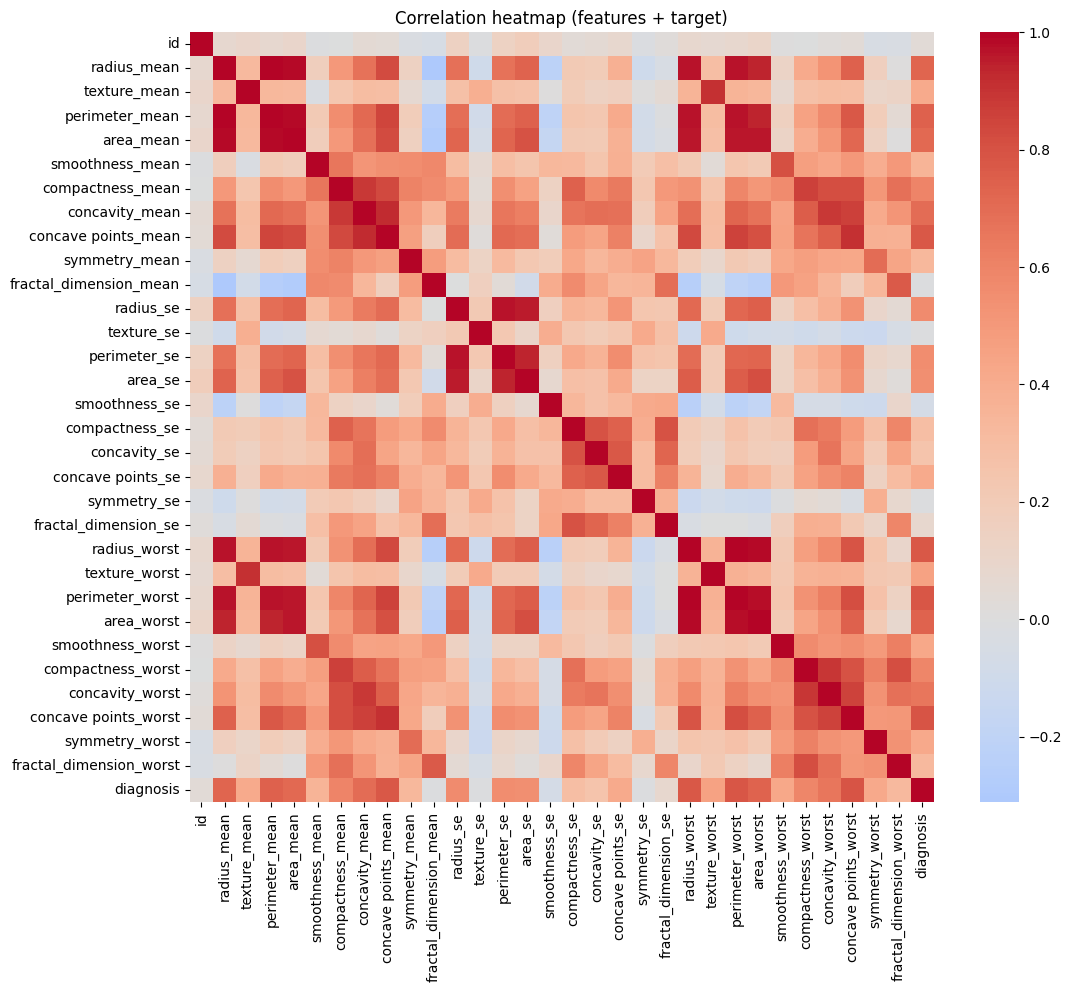


Class distribution before SMOTE:
diagnosis
0    357
1    212
Name: count, dtype: int64

Shape after SMOTE: (714, 31)
Class distribution after SMOTE:
diagnosis
1    357
0    357
Name: count, dtype: int64


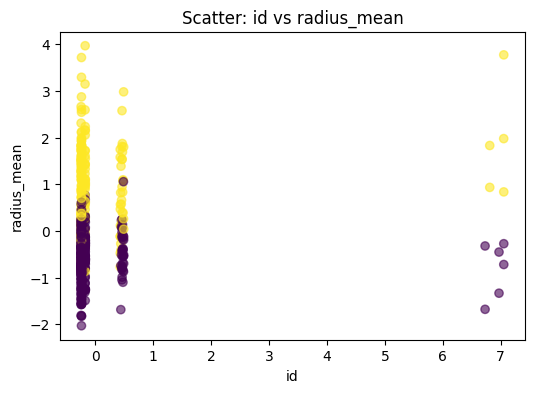

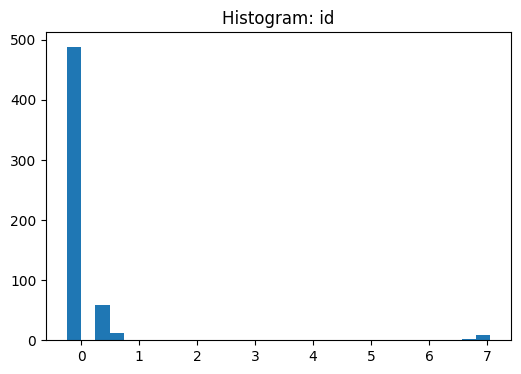

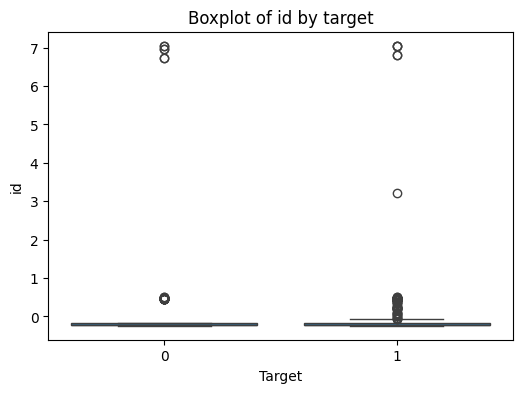

LogisticRegression trained
DecisionTree trained
KNN trained
SVM trained
NeuralNet_MLP trained
Bagging trained
AdaBoost trained
GradientBoosting trained
XGBoost trained
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5906
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500876 -> initscore=0.003503
[LightGBM] [Info] Start training from score 0.003503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

PermutationExplainer explainer: 144it [00:15,  3.46it/s]


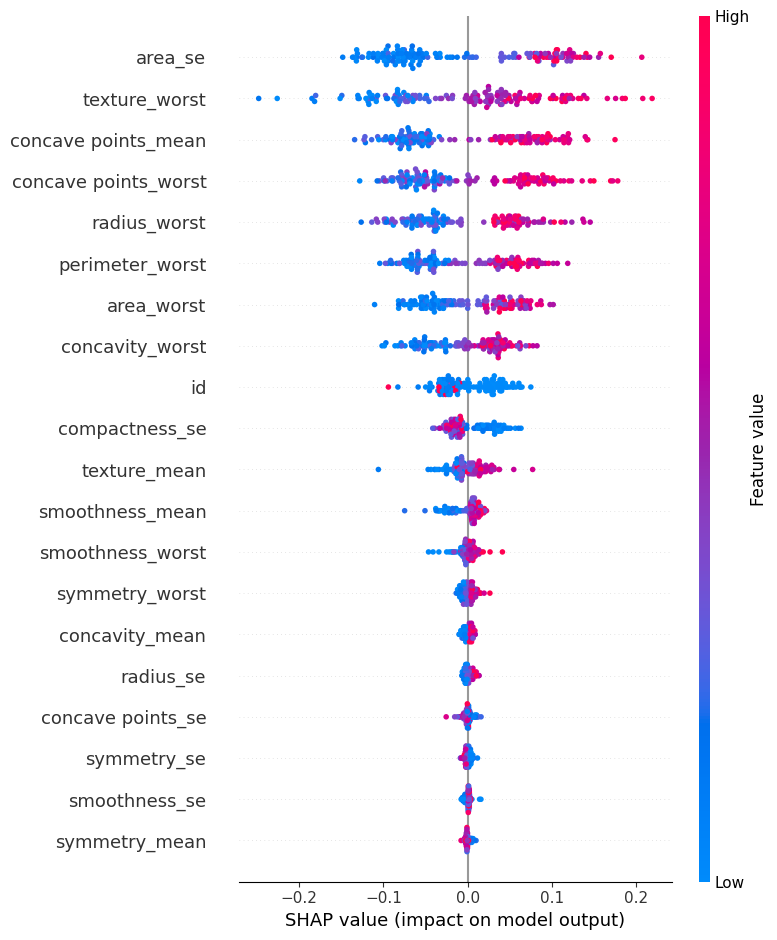

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
3297/3297 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

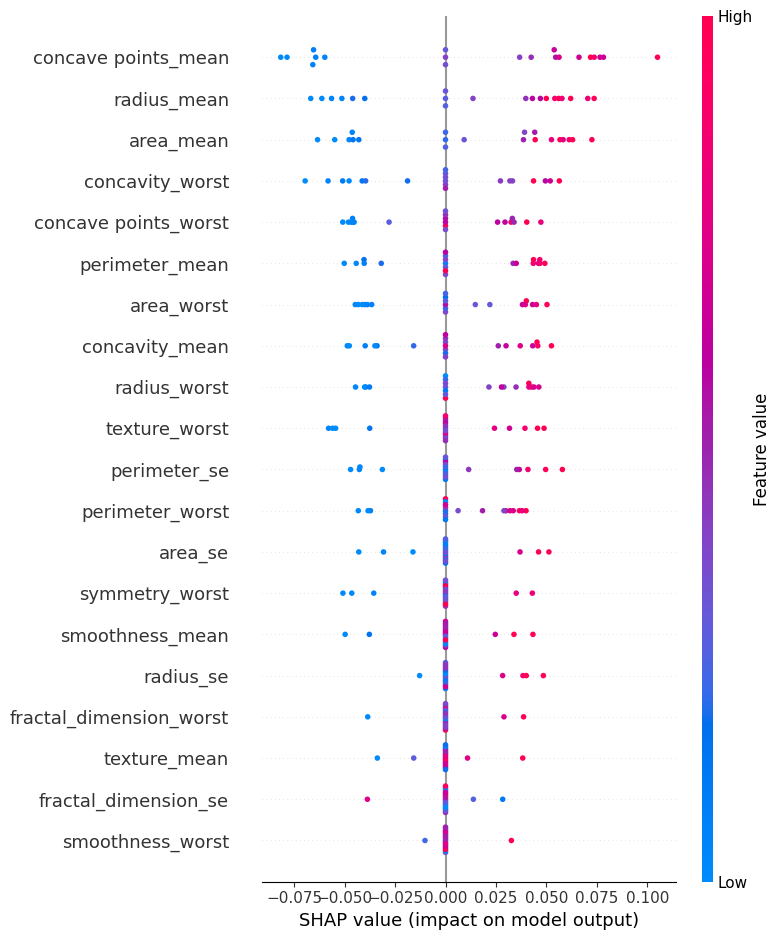

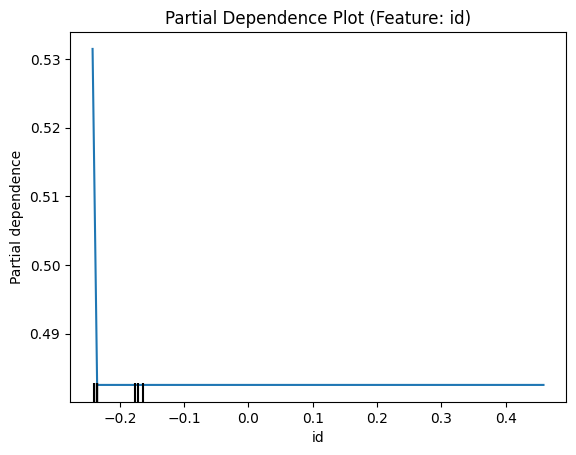

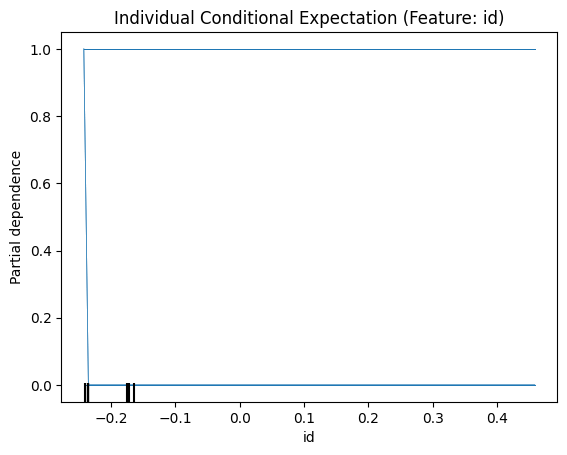


Inference:
1) After pre-processing and balancing, models learned from a more representative dataset; scaling and encoding stabilized training.
2) SHAP and LIME explain model predictions, highlighting the most influential features for both global and individual predictions.


In [ ]:
# breast Cancer Dataset - Explainable AI Notebook
# Sections separated as notebook cells (use in Jupyter or VSCode interactive)

# %%
# 0. Install required packages (uncomment if running in a fresh env)
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn lime shap xgboost lightgbm catboost pdpbox

# %%
# 1. Imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import PartialDependenceDisplay

# XAI packages
import lime
from lime import lime_tabular
import shap

# %%
# 2. Load dataset
path = '/content/sample_data/archive (10).csv'
df = pd.read_csv(path)
print('Shape:', df.shape)
# quick peek
print(df.head())

# %%
# 3. Pre-processing
# 3.1 Handle nulls
print('\nMissing values per column:')
print(df.isnull().sum())

# For simplicity: numeric -> mean, categorical -> mode
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print('\nMissing values after imputation:')
print(df.isnull().sum())

# 3.2 Encoding categorical features
# If target column named 'class' or 'LUNG_CANCER' adjust accordingly; try to infer
possible_targets = ['diagnosis']
cols_lower = [c.lower() for c in df.columns]
# assume last column is target if none of above
if any(t in cols_lower for t in possible_targets):
    # find the matching column
    for c in df.columns:
        if c.lower() in possible_targets:
            target_col = c
            break
else:
    target_col = df.columns[-1]

print('\nTarget column chosen:', target_col)

# Encode target if needed
if df[target_col].dtype == 'object':
    le_target = LabelEncoder()
    df[target_col] = le_target.fit_transform(df[target_col])

# Encode categorical features using OneHot for low-cardinality, LabelEncoder for binary
features = df.drop(columns=[target_col])

cat_features = features.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical features:', cat_features)

# If many categories, use one-hot
for c in cat_features:
    if df[c].nunique() <= 2:
        df[c] = LabelEncoder().fit_transform(df[c])
    else:
        df = pd.get_dummies(df, columns=[c], drop_first=True)

# 3.3 Feature/target split
X = df.drop(columns=[target_col])
y = df[target_col]

# 3.4 Correlation matrix
# compute correlation and show heatmap
corr = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (features + target)')
plt.show()

# 3.5 Normalize / scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3.6 Handle class imbalance with SMOTE
print('\nClass distribution before SMOTE:')
print(y.value_counts())

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print('\nShape after SMOTE:', X_res.shape)
print('Class distribution after SMOTE:')
print(pd.Series(y_res).value_counts())

# 3.7 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# %%
# 4. Visualizations (pick any 3) - Scatter, Histogram, Boxplot
# scatter between first two numeric features
num_features = X.columns.tolist()
if len(num_features) >= 2:
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[num_features[0]], X_scaled[num_features[1]], c=y, alpha=0.6)
    plt.xlabel(num_features[0])
    plt.ylabel(num_features[1])
    plt.title('Scatter: {} vs {}'.format(num_features[0], num_features[1]))
    plt.show()

# histogram of first numeric feature
plt.figure(figsize=(6,4))
plt.hist(X_scaled[num_features[0]], bins=30)
plt.title('Histogram: {}'.format(num_features[0]))
plt.show()

# boxplot of first numeric feature by target (use resampled data)
plt.figure(figsize=(6,4))
sns.boxplot(x=y_res, y=X_res[num_features[0]]) # Changed X_res[:,0] to X_res[num_features[0]]
plt.title('Boxplot of {} by target'.format(num_features[0]))
plt.xlabel('Target')
plt.show()

# %%
# 5. Machine Learning models (5): Train models - no metrics printed as requested
models_ml = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'NeuralNet_MLP': MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500)
}

trained_ml = {}
for name, model in models_ml.items():
    model.fit(X_train, y_train)
    trained_ml[name] = model
    print(f'{name} trained')

# %%
# 6. Ensembles (10)
ensembles = {
    'Bagging': BaggingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=50),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Voting_hard': VotingClassifier(estimators=[('lr', models_ml['LogisticRegression']), ('dt', models_ml['DecisionTree']), ('knn', models_ml['KNN'])], voting='hard'),
    'Stacking': StackingClassifier(estimators=[('lr', models_ml['LogisticRegression']), ('dt', models_ml['DecisionTree'])], final_estimator=MLPClassifier(max_iter=300)),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'HistGradientBoosting': HistGradientBoostingClassifier()
}

trained_ensembles = {}
for name, ens in ensembles.items():
    ens.fit(X_train, y_train)
    trained_ensembles[name] = ens
    print(f'{name} trained')

# %%
# 7. Deep Learning models (5 variants using Keras)
from tensorflow import keras
from tensorflow.keras import layers

# prepare tf datasets
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

def build_model_1(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_2(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_3(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(32, activation='tanh'),
        layers.Dense(16, activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_4(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_5(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train_np.shape[1]
models_dl = {
    'DL_model_1': build_model_1(input_dim),
    'DL_model_2': build_model_2(input_dim),
    'DL_model_3': build_model_3(input_dim),
    'DL_model_4': build_model_4(input_dim),
    'DL_model_5': build_model_5(input_dim)
}

# Fit briefly (few epochs) - adjust epochs as needed
for name, m in models_dl.items():
    print('Training', name)
    m.fit(X_train_np, np.array(y_train), epochs=5, batch_size=32, validation_split=0.1, verbose=0)
    print(name, 'trained')

# %%
# 8. XAI: LIME for one black-box model (use SVM or NeuralNet_MLP)

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['No', 'Yes'],
    mode='classification'
)

# pick one instance from test set
i = 0
exp = explainer.explain_instance(
    X_test.iloc[i].values,
    trained_ml['SVM'].predict_proba,
    num_features=10
)
print('\nLIME explanation for one instance:')
print(exp.as_list())
# Optional (if using Jupyter): exp.show_in_notebook()

# %%
# 9. XAI: SHAP (example with XGBoost and one deep model)

shap.initjs()

# --- SHAP for XGBoost (tree-based model) ---
def xgb_predict_raw(X_input):
    return trained_ensembles['XGBoost'].predict_proba(X_input)[:, 1]

explainer_xgb = shap.Explainer(xgb_predict_raw, X_test)
shap_values_xgb = explainer_xgb(X_test)

# summary plot (global importance)
shap.summary_plot(shap_values_xgb, X_test, show=True)

# --- SHAP for Deep Learning (Keras model) ---
background = X_train.sample(n=50, random_state=42)
model_for_shap = models_dl['DL_model_1']

def keras_predict(X_input):
    # Return positive class probability only
    return model_for_shap.predict(X_input).flatten()

# Use KernelExplainer (slower, but model-agnostic)
explainer_kernel = shap.KernelExplainer(keras_predict, background)

# Take small subset for speed
X_sample = X_test.iloc[:20]

# Compute SHAP values
shap_values_keras = explainer_kernel.shap_values(X_sample)

# Handle version differences: SHAP may return list or np.array
if isinstance(shap_values_keras, list):
    shap_values_keras = shap_values_keras[0]

# SHAP summary plot for the deep learning model
shap.summary_plot(shap_values_keras, X_sample, show=True)

# %%
# 10. XAI: PDP and ICE (Partial Dependence & Individual Conditional Expectation)

# Choose a numerical feature to visualize
feature_to_plot = 0  # you can change index here
feat_name = X_train.columns[feature_to_plot]

# PDP (average relationship)
PartialDependenceDisplay.from_estimator(
    trained_ml['DecisionTree'],
    X_test,
    [feat_name],
    kind='average'
)
plt.title(f'Partial Dependence Plot (Feature: {feat_name})')
plt.show()

# ICE (individual-level relationships)
PartialDependenceDisplay.from_estimator(
    trained_ml['DecisionTree'],
    X_test,
    [feat_name],
    kind='individual'
)
plt.title(f'Individual Conditional Expectation (Feature: {feat_name})')
plt.show()

# %%
# 11. Inference (2 lines)
print('\nInference:')
print('1) After pre-processing and balancing, models learned from a more representative dataset; scaling and encoding stabilized training.')
print('2) SHAP and LIME explain model predictions, highlighting the most influential features for both global and individual predictions.')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step

🔍 Model Performance Summary:
                   Model  Accuracy  Precision  Recall      F1  ROC_AUC
0             ExtraTrees    0.9860     1.0000  0.9718  0.9857   0.9992
1               CatBoost    0.9720     1.0000  0.9437  0.9710   0.9992
2             DL_model_2    0.9930     1.0000  0.9859  0.9929   0.9990
3               Stacking    0.9790     0.9857  0.9718  0.9787   0.9990
4                Bagging    0.9790     1.0000  0.9577  0.9784   0.9989
5             DL_model_5    0.9720     0.9718  0.9718  0.9718   0.9980
6               AdaBoost    0.9580     1.0000  0.9155  0.9559   0.9980
7             DL_model_1    0.9580     0.9710  0.9437  0.9571   0.9978
8               LightGBM    0.9720     1.0000  0.9437  0.9710   0.9977
9   HistGradientBoosting    0.9720     1.0000  0.9437  0.9710   0.997

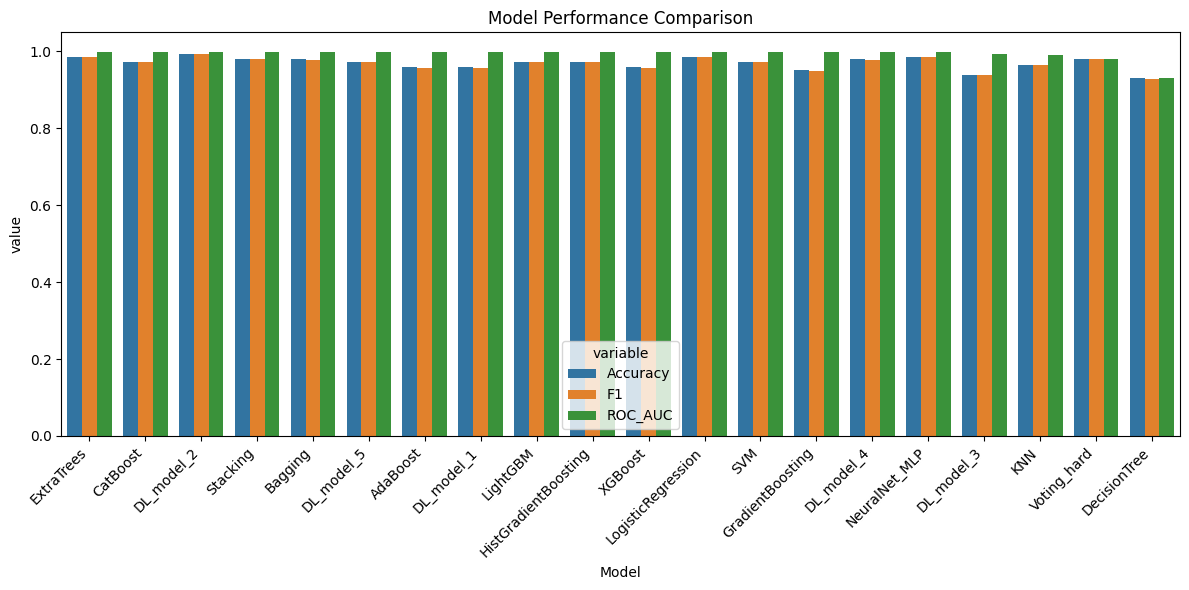


Best model based on ROC-AUC: ExtraTrees


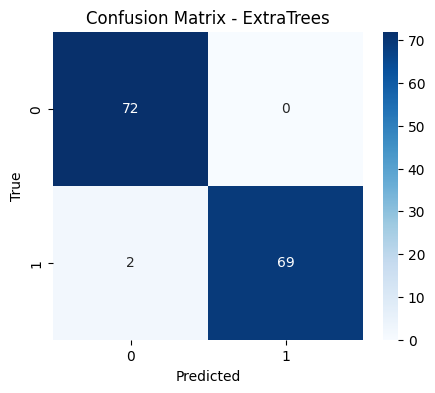

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


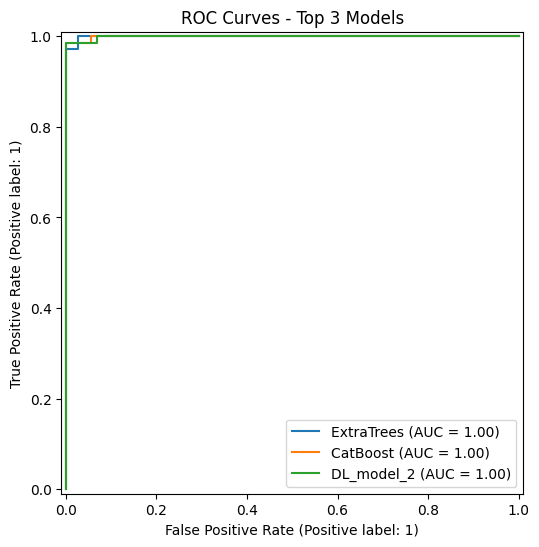

In [ ]:
# %%
# 12. Evaluation & Model Comparison

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# --- Helper function for metrics ---
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for models without predict_proba (e.g., SVM without prob=True)
        try:
            y_proba = model.decision_function(X_test)
        except:
            y_proba = y_pred

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    }

# --- Evaluate ML models ---
results_ml = [evaluate_model(name, model, X_test, y_test) for name, model in trained_ml.items()]

# --- Evaluate Ensemble models ---
results_ens = [evaluate_model(name, model, X_test, y_test) for name, model in trained_ensembles.items()]

# --- Evaluate Deep Learning models ---
results_dl = []
for name, model in models_dl.items():
    y_proba = model.predict(X_test_np).flatten()
    y_pred = (y_proba > 0.5).astype(int)
    results_dl.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

# --- Combine all results ---
df_results = pd.DataFrame(results_ml + results_ens + results_dl)
df_results = df_results.sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)

print("\n🔍 Model Performance Summary:")
print(df_results.round(4))

# --- Plot performance comparison ---
plt.figure(figsize=(12,6))
sns.barplot(data=df_results.melt(id_vars="Model", value_vars=["Accuracy","F1","ROC_AUC"]),
            x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Confusion Matrix for Best Model ---
best_model_name = df_results.iloc[0]['Model']
print(f"\nBest model based on ROC-AUC: {best_model_name}")

# Get model object
if best_model_name in trained_ml:
    best_model = trained_ml[best_model_name]
elif best_model_name in trained_ensembles:
    best_model = trained_ensembles[best_model_name]
else:
    best_model = models_dl[best_model_name]

# Predict and plot confusion matrix
if "DL_model" in best_model_name:
    y_proba = best_model.predict(X_test_np).flatten()
    y_pred = (y_proba > 0.5).astype(int)
else:
    y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- ROC Curve for Top 3 Models ---
top3 = df_results['Model'].head(3).tolist()
plt.figure(figsize=(8,6))
for mname in top3:
    if mname in trained_ml:
        model = trained_ml[mname]
    elif mname in trained_ensembles:
        model = trained_ensembles[mname]
    else:
        model = models_dl[mname]

    if "DL_model" in mname:
        y_proba = model.predict(X_test_np).flatten()
    else:
        y_proba = model.predict_proba(X_test)[:,1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=mname, ax=plt.gca())

plt.title("ROC Curves - Top 3 Models")
plt.show()


In [ ]:
# %%
# 13. Prediction Demo - Breast Cancer Outcome

# Identify the best model (from Section 12 results)
best_model_name = df_results.iloc[0]['Model']
print(f"🧠 Using best model for prediction: {best_model_name}")

# Retrieve the trained model
if best_model_name in trained_ml:
    best_model = trained_ml[best_model_name]
    X_used = X_test
elif best_model_name in trained_ensembles:
    best_model = trained_ensembles[best_model_name]
    X_used = X_test
else:
    best_model = models_dl[best_model_name]
    X_used = X_test_np  # NumPy format for deep learning

# --- Pick a sample from test data ---
sample_index = 0  # Change to test different patients
sample_features = X_test.iloc[sample_index:sample_index+1] if not "DL_model" in best_model_name else X_test_np[sample_index:sample_index+1]

print("\n🔍 Features for one sample (scaled):")
print(sample_features)

# --- Make prediction ---
if "DL_model" in best_model_name:
    pred_proba = best_model.predict(sample_features).flatten()[0]
    pred_label = int(pred_proba > 0.5)
else:
    pred_proba = best_model.predict_proba(sample_features)[:,1][0]
    pred_label = best_model.predict(sample_features)[0]

# --- Map back to original class labels if applicable ---
if 'le_target' in locals():
    pred_class = le_target.inverse_transform([pred_label])[0]
else:
    pred_class = "Positive (Cancer)" if pred_label == 1 else "Negative (No Cancer)"

print(f"\n💡 Predicted probability of cancer: {pred_proba:.4f}")
print(f"🩺 Final Prediction: {pred_class}")


🧠 Using best model for prediction: ExtraTrees

🔍 Features for one sample (scaled):
           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
631 -0.240488     1.917095     -0.614953        2.103541    1.95904   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
631         2.250183          3.273287        3.722583             3.144977   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
631       2.554936  ...      2.308577      -0.186048         2.749677   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
631    2.405625          1.541303           2.763002         2.915069   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
631              2.559036        2.154742                 1.151587  

[1 rows x 31 columns]

💡 Predicted probability of cancer: 1.0000
🩺 Final Prediction: M


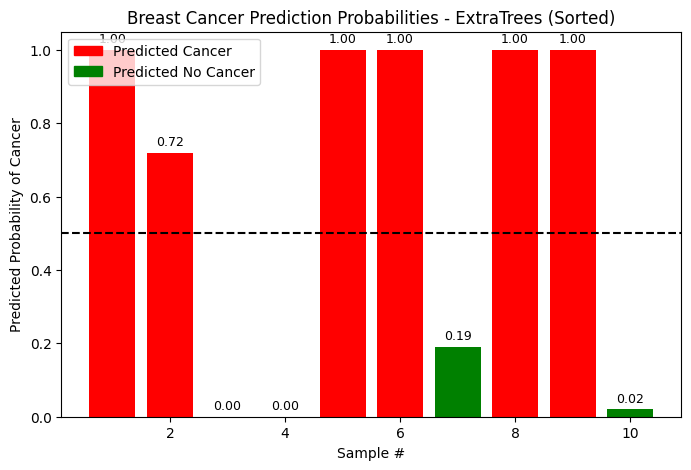

In [ ]:
# %%
#  Visualization: Breast Cancer Prediction Probabilities

# Predict probabilities and labels
y_proba_all = trained_ensembles['ExtraTrees'].predict_proba(X_test)[:, 1]
y_pred_all = (y_proba_all >= 0.5).astype(int)

# Create dataframe for visualization
df_pred_viz = pd.DataFrame({
    'Sample': range(1, 11),
    'Predicted_Probability': y_proba_all[:10],
    'Predicted_Label': y_pred_all[:10]
})

# Sort samples by probability
df_pred_viz = df_pred_viz.sort_values("Predicted_Probability", ascending=False)

# Color map
colors = df_pred_viz["Predicted_Label"].map({1: 'red', 0: 'green'})

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(df_pred_viz["Sample"], df_pred_viz["Predicted_Probability"], color=colors)

# Add threshold line
plt.axhline(0.5, color='black', linestyle='--', label='Threshold = 0.5')

# Add probability labels on top of bars
for i, val in enumerate(df_pred_viz["Predicted_Probability"]):
    plt.text(df_pred_viz["Sample"].iloc[i], val + 0.02, f"{val:.2f}", ha='center', fontsize=9)

# Labels and legend
plt.title("Breast Cancer Prediction Probabilities - ExtraTrees (Sorted)")
plt.ylabel("Predicted Probability of Cancer")
plt.xlabel("Sample #")
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,color='red',label='Predicted Cancer'),
    plt.Rectangle((0,0),1,1,color='green',label='Predicted No Cancer')
])
plt.show()
